In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# NA value and fix

In [6]:
train.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_for_age = train[train['Age'].isna()]
test_for_age = train[~train['Age'].isna()]

In [8]:
# train_for_age

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_for_age['Sex'] = le.fit_transform(train_for_age['Sex'])

le2 = preprocessing.LabelEncoder()
train_for_age['Embarked'] = le2.fit_transform(train_for_age['Embarked'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
labelsforage = ["Sex", "Survived", "Pclass", "SibSp", "Parch", "Fare", "Embarked"]

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# EDA

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

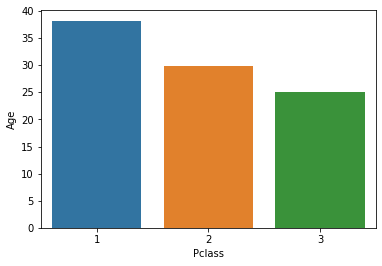

In [12]:
sns.barplot(train.groupby(['Pclass'])['Age'].mean().index, train.groupby(['Pclass'])['Age'].mean())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>

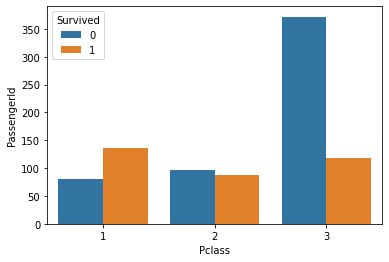

In [13]:
sns.barplot(train.groupby(['Pclass','Survived'], as_index=False).count()['Pclass'], 
            train.groupby(['Pclass','Survived'], as_index=False).count()['PassengerId'], 
            hue=train.groupby(['Pclass','Survived'], as_index=False).count()['Survived'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Fare'>

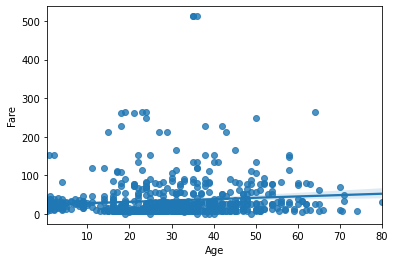

In [14]:
sns.regplot(train['Age'], train['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

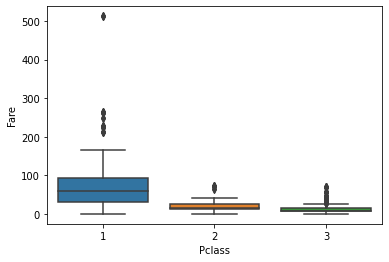

In [15]:
sns.boxplot(data=train, x='Pclass', y='Fare')

# Feature Engineering

In [16]:
train['family'] = train['SibSp'] + train['Parch']

In [27]:
z = []
for lst in np.array(train['Name'].str.split(",")):
    z.append(lst[1].split('.')[0].strip())
    
train['Title'] = z

In [40]:
# train.append(pd.get_dummies(train[['Sex', 'Embarked']]))

In [43]:
train = pd.get_dummies(train, columns=['Sex', 'Pclass', 'Embarked'])
le3 = preprocessing.LabelEncoder()
train['Title'] = le3.fit_transform(train['Title'])

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,family,Title,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,Mr,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,Mrs,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,Mrs,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,Mr,0,1,0,0,1,0,0,1


In [58]:
train_df = train.drop(["PassengerId", "Ticket", "Name", "Cabin", "Age"], axis=1)

# Train test split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Survived'], axis=1), train['Survived'], test_size=0.3, 
                                                    random_state=42, stratify=train['Survived'])

# Machine Learning Algorithms

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
accs = []
X=train_df.drop(['Survived'], axis=1).values
y=train_df['Survived'].values
skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1 = LinearDiscriminantAnalysis()
    clf2 = DecisionTreeClassifier(random_state=0)
    clf3 = KNeighborsClassifier(n_neighbors=3)
    clf4 = RandomForestClassifier(max_depth=5, random_state=0)
    clf5 = SVC(gamma='auto')
    
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    clf4.fit(X_train, y_train)
    clf5.fit(X_train, y_train)
    
    accs.append([clf.score(X_test,y_test), clf2.score(X_test,y_test), clf3.score(X_test,y_test), clf4.score(X_test,y_test), clf5.score(X_test,y_test)])
    
print(np.array(accs).mean(axis=0))

[0.84287141 0.81260924 0.76662921 0.82156055 0.78453184]


In [90]:
models = [type(clf1).__name__, type(clf2).__name__, type(clf3).__name__, type(clf4).__name__, type(clf5).__name__]

<AxesSubplot:>

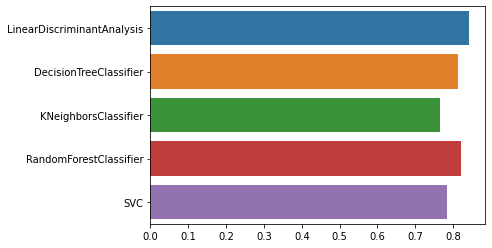

In [102]:
sns.barplot(y=models, x=np.array(accs).mean(axis=0), orientation='horizontal')

In [103]:
importances = clf4.feature_importances_
forest_importances = pd.Series(importances, index=train_df.drop(['Survived'], axis=1).columns)

<AxesSubplot:>

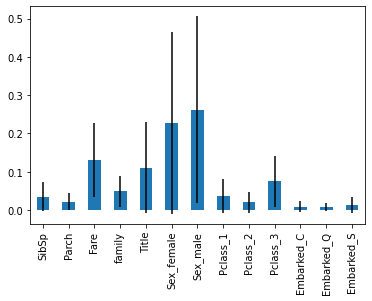

In [109]:
import matplotlib.pyplot as plt
std = np.std([
    tree.feature_importances_ for tree in clf4.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

## [Feature Importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)